# Ph·∫ßn 1: Principal Component Analysis (PCA) 
# M·ª•c ti√™u: Hi·ªÉu v√† √°p d·ª•ng PCA ƒë·ªÉ gi·∫£m chi·ªÅu d·ªØ li·ªáu v√† ph√¢n t√≠ch th√†nh ph·∫ßn ch√≠nh. 
# D·ªØ li·ªáu: S·ª≠ d·ª•ng b·ªô d·ªØ li·ªáu Delay Prediction ho·∫∑c b·∫•t k·ª≥ b·ªô d·ªØ li·ªáu nhi·ªÅu chi·ªÅu n√†o.

In [567]:
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [568]:
# Read data from file 
data = pd.read_csv("data\delay_7_9_CONDITION_PRODUCT_SUPPLIER.csv")

In [569]:
# Displays the first 5 data samples
data.head()

Order date SUBSIDIARY_CD       GLOBAL_NO  CLASSIFY_CD  CUST_CD BRAND_CD  \
0  2022-08-25           MJP  08344472000137     21031103   344472     OSA1   
1  2022-08-12           MJP  06000641365551      3712333      641     MSM1   
2  2022-07-08           MJP  07032167936864     21045918    32167     SMC1   
3  2022-07-08           MJP  01710046000973     21058302   710046     MIB1   
4  2022-08-25           MJP  07107539916817     21050569   107539     NIQ1   

      INNER_CD SUPPLIER_CD  Sales order line number  Stock class  ...  \
0  F7171260007        8121                        8            1  ...   
1  30071630003        0263                        1            1  ...   
2  F7499483132        9102                        1            1  ...   
3  F4524160001        9163                        1            1  ...   
4  F3017310155        9176                        6            1  ...   

   PACK QTY  WEIGHT PER PIECE  SUPPLIER_DIV  SPECIAL_DIV  SO_DAY_OF_MONTH  \
0         0              1020           2.0            0               25   
1         0               120           1.0            0               12   
2         0             18000           3.0            0                8   
3         0               500           2.0            0                8   
4         0                36           2.0            0               25   

  SO_DAY_OF_WEEK REASON_CD  SOUF_RCV_NO  QTUF_RCV_NO  SO_TIME  
0              4     453.0          NaN          NaN   135557  
1              5     451.0          NaN          NaN   134532  
2              5     410.0          NaN          NaN   160936  
3              5     453.0          NaN          NaN   160702  
4              4     455.0          NaN          NaN   160244  

[5 rows x 37 columns]

In [570]:
# Convert string data to numbers using Label Encoding
label_encoders = {}
for column in data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [571]:
# Display data
data

Order date  SUBSIDIARY_CD  GLOBAL_NO  CLASSIFY_CD  CUST_CD  BRAND_CD  \
0              47              0      15650     21031103   344472       582   
1              36              0       6061      3712333      641       451   
2               6              0       7347     21045918    32167       667   
3               6              0       2073     21058302   710046       421   
4              47              0       8544     21050569   107539       509   
...           ...            ...        ...          ...      ...       ...   
26212          22              0      24402     21020310   147666       807   
26213          22              0      22772     23027680   251577       779   
26214          22              0      22430      3721101   251577       451   
26215          42              0      21878      6050902   254252       451   
26216          66              0      21890      3812709   254252       451   

       INNER_CD  SUPPLIER_CD  Sales order line number  Stock class  ...  \
0          7998          331                        8            1  ...   
1          1420           19                        1            1  ...   
2          8618          510                        1            1  ...   
3          6607          544                        1            1  ...   
4          5994          551                        6            1  ...   
...         ...          ...                      ...          ...  ...   
26212      5982          319                        1            1  ...   
26213      9535          489                        2            1  ...   
26214       726          169                        1            1  ...   
26215      5182           47                        6            0  ...   
26216      3064           42                        3            1  ...   

       PACK QTY  WEIGHT PER PIECE  SUPPLIER_DIV  SPECIAL_DIV  SO_DAY_OF_MONTH  \
0             0              1020           2.0            0               25   
1             0               120           1.0            0               12   
2             0             18000           3.0            0                8   
3             0               500           2.0            0                8   
4             0                36           2.0            0               25   
...         ...               ...           ...          ...              ...   
26212         0               100           3.0            1               27   
26213        10               315           3.0            1               27   
26214         0                28           1.0            1               27   
26215         0                40           2.0            1               19   
26216         0                 1           3.0            1               16   

       SO_DAY_OF_WEEK  REASON_CD  SOUF_RCV_NO  QTUF_RCV_NO  SO_TIME  
0                   4      453.0         1267          NaN   135557  
1                   5      451.0         1267          NaN   134532  
2                   5      410.0         1267          NaN   160936  
3                   5      453.0         1267          NaN   160702  
4                   4      455.0         1267          NaN   160244  
...               ...        ...          ...          ...      ...  
26212               3        NaN         1267          NaN    84245  
26213               3      401.0         1267          NaN   190113  
26214               3        NaN         1267          NaN   195137  
26215               5      401.0         1267          NaN   160258  
26216               5      451.0         1267          NaN   181626  

[26217 rows x 37 columns]

In [572]:
# Display features
data.columns

Index(['Order date', 'SUBSIDIARY_CD', 'GLOBAL_NO', 'CLASSIFY_CD', 'CUST_CD',
       'BRAND_CD', 'INNER_CD', 'SUPPLIER_CD', 'Sales order line number',
       'Stock class', 'Consider count hodiday Saturday', 'SO QTY',
       'OTHER AREA SHIP DIV', 'ALLOCATION QTY', 'SUPPLIER INV AMOUNT',
       'PACKING RANK', 'PRODUCT_CD', 'PRODUCT ATTRIBUTION', 'SPECIAL DIV',
       'LOGICAL PLANT', 'PURCHASE AMOUNT', 'VSD', 'DIRECT SHIP FLG',
       'DELI_DIV', 'label', 'Ship Mode', 'SHIP DECISION NO', 'PACK QTY',
       'WEIGHT PER PIECE', 'SUPPLIER_DIV', 'SPECIAL_DIV', 'SO_DAY_OF_MONTH',
       'SO_DAY_OF_WEEK', 'REASON_CD', 'SOUF_RCV_NO', 'QTUF_RCV_NO', 'SO_TIME'],
      dtype='object')

In [573]:
col = ['Order date', 'SUBSIDIARY_CD', 'GLOBAL_NO', 'CLASSIFY_CD', 'CUST_CD',
       'BRAND_CD', 'INNER_CD', 'SUPPLIER_CD', 'Sales order line number',
       'Stock class', 'Consider count hodiday Saturday', 'SO QTY',
       'OTHER AREA SHIP DIV', 'ALLOCATION QTY', 'SUPPLIER INV AMOUNT',
       'PACKING RANK', 'PRODUCT_CD', 'PRODUCT ATTRIBUTION', 'SPECIAL DIV',
       'LOGICAL PLANT', 'PURCHASE AMOUNT', 'VSD', 'DIRECT SHIP FLG',
       'DELI_DIV', 'label', 'Ship Mode', 'SHIP DECISION NO', 'PACK QTY',
       'WEIGHT PER PIECE', 'SUPPLIER_DIV', 'SPECIAL_DIV', 'SO_DAY_OF_MONTH',
       'SO_DAY_OF_WEEK', 'REASON_CD', 'SOUF_RCV_NO', 'QTUF_RCV_NO', 'SO_TIME']

In [574]:
# Standardized data
scaler = StandardScaler()
data = scaler.fit_transform(data)

In [575]:
# Display data
data

array([[ 0.64781761,  0.        ,  0.33587925, ...,  0.19415187,
                nan, -0.03995309],
       [ 0.13816266,  0.        , -0.93113339, ...,  0.19415187,
                nan, -0.07156091],
       [-1.25180539,  0.        , -0.76121179, ...,  0.19415187,
                nan,  0.74265667],
       ...,
       [-0.5104891 ,  0.        ,  1.23173343, ...,  0.19415187,
                nan,  1.79730959],
       [ 0.41615627,  0.        ,  1.15879663, ...,  0.19415187,
                nan,  0.72174925],
       [ 1.52813071,  0.        ,  1.16038221, ...,  0.19415187,
                nan,  1.3806722 ]])

In [576]:
# Handle missing data
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")
data = imputer.fit_transform(data)

In [577]:
# Convert data numpy to dataframe
data = pd.DataFrame(data, columns=col)
data

Order date  SUBSIDIARY_CD  GLOBAL_NO  CLASSIFY_CD   CUST_CD  BRAND_CD  \
0        0.647818            0.0   0.335879     1.652334  0.342148  1.083543   
1        0.138163            0.0  -0.931133    -0.577695 -1.056991 -0.033263   
2       -1.251805            0.0  -0.761212     1.654242 -0.928703  1.808188   
3       -1.251805            0.0  -1.458075     1.655836  1.829766 -0.289020   
4        0.647818            0.0  -0.603050     1.654840 -0.621995  0.461201   
...           ...            ...        ...          ...       ...       ...   
26212   -0.510489            0.0   1.492298     1.650944 -0.458707  3.001721   
26213   -0.510489            0.0   1.276923     1.909421 -0.035866  2.763015   
26214   -0.510489            0.0   1.231733    -0.576566 -0.035866 -0.033263   
26215    0.416156            0.0   1.158797    -0.276572 -0.024981 -0.033263   
26216    1.528131            0.0   1.160382    -0.564770 -0.024981 -0.033263   

       INNER_CD  SUPPLIER_CD  Sales order line number  Stock class  ...  \
0      1.430088     0.879575                -0.059091     0.104648  ...   
1     -1.084976    -1.264815                -0.060676     0.104648  ...   
2      1.667142     2.109851                -0.060676     0.104648  ...   
3      0.898246     2.343534                -0.060676     0.104648  ...   
4      0.663869     2.391645                -0.059544     0.104648  ...   
...         ...          ...                      ...          ...  ...   
26212  0.659281     0.797099                -0.060676     0.104648  ...   
26213  2.017752     1.965517                -0.060450     0.104648  ...   
26214 -1.350323    -0.233858                -0.060676     0.104648  ...   
26215  0.353405    -1.072369                -0.059544    -9.555803  ...   
26216 -0.456401    -1.106735                -0.060223     0.104648  ...   

       PACK QTY  WEIGHT PER PIECE  SUPPLIER_DIV  SPECIAL_DIV  SO_DAY_OF_MONTH  \
0     -0.045246         -0.056712      0.669431    -0.214384         1.276514   
1     -0.045246         -0.133352     -0.598117    -0.214384        -0.215348   
2     -0.045246          1.389235      1.936980    -0.214384        -0.674383   
3     -0.045246         -0.100993      0.669431    -0.214384        -0.674383   
4     -0.045246         -0.140506      0.669431    -0.214384         1.276514   
...         ...               ...           ...          ...              ...   
26212 -0.045246         -0.135056      1.936980     4.664527         1.506032   
26213 -0.005393         -0.116747      1.936980     4.664527         1.506032   
26214 -0.045246         -0.141187     -0.598117     4.664527         1.506032   
26215 -0.045246         -0.140165      0.669431     4.664527         0.587962   
26216 -0.045246         -0.143486      1.936980     4.664527         0.243686   

       SO_DAY_OF_WEEK     REASON_CD  SOUF_RCV_NO   QTUF_RCV_NO   SO_TIME  
0            0.573905  9.135142e-01     0.194152  1.480297e-16 -0.039953  
1            1.240959  8.673902e-01     0.194152  1.480297e-16 -0.071561  
2            1.240959 -7.815016e-02     0.194152  1.480297e-16  0.742657  
3            1.240959  9.135142e-01     0.194152  1.480297e-16  0.735441  
4            0.573905  9.596381e-01     0.194152  1.480297e-16  0.721318  
...               ...           ...          ...           ...       ...  
26212       -0.093149 -5.237338e-16     0.194152  1.480297e-16 -1.622256  
26213       -0.093149 -2.857078e-01     0.194152  1.480297e-16  1.642385  
26214       -0.093149 -5.237338e-16     0.194152  1.480297e-16  1.797310  
26215        1.240959 -2.857078e-01     0.194152  1.480297e-16  0.721749  
26216        1.240959  8.673902e-01     0.194152  1.480297e-16  1.380672  

[26217 rows x 37 columns]

In [578]:
# Function Principal Component Analysis
def myPCA(A):
    cov_matrix = np.cov(A.T)
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

    return eigenvectors, eigenvalues

In [579]:
eigenvectors, eigenvalues = myPCA(data.values)

In [580]:
eigenvectors

array([[-3.57710229e-02,  2.56173336e-02,  1.71521198e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 3.01298399e-02, -1.09667258e-01,  1.89866009e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 1.36612740e-01,  1.73961822e-01,  1.10848572e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 3.81394297e-04,  6.99391533e-04,  4.29322555e-04, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.20013239e-03, -2.17655880e-02, -3.23108966e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [581]:
eigenvalues

array([ 4.67835384e+00,  3.08451966e+00,  2.20769813e+00,  2.06433229e+00,
        1.80742777e+00,  1.71627986e+00,  1.40614291e+00,  8.03130122e-02,
        8.23144065e-03,  3.17907653e-03,  2.38589045e-01,  2.52939886e-01,
        2.84030732e-01,  4.04205794e-01,  4.83915718e-01,  1.21231169e+00,
        6.37791168e-01,  1.17048491e+00,  7.30730865e-01,  1.10975501e+00,
        7.81284979e-01,  1.07010163e+00,  1.02822856e+00,  1.04005626e+00,
        8.20899601e-01,  8.45670819e-01,  8.78968873e-01,  9.13145218e-01,
        9.20483913e-01,  9.54379575e-01,  5.46284035e-09,  1.67189796e-16,
       -4.04022339e-17,  2.36149070e-17,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00])

In [582]:
# Sorted the eigenvectors in descending order of eigenvalues
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:,sorted_indices]

In [583]:
sorted_eigenvectors

array([[-3.57710229e-02,  2.56173336e-02,  1.71521198e-01, ...,
         0.00000000e+00,  0.00000000e+00, -4.78794995e-15],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 3.01298399e-02, -1.09667258e-01,  1.89866009e-02, ...,
         0.00000000e+00,  0.00000000e+00, -3.88743153e-15],
       ...,
       [ 1.36612740e-01,  1.73961822e-01,  1.10848572e-01, ...,
         0.00000000e+00,  0.00000000e+00,  3.38646473e-15],
       [ 3.81394297e-04,  6.99391533e-04,  4.29322555e-04, ...,
         0.00000000e+00,  0.00000000e+00, -1.31523815e-15],
       [ 2.20013239e-03, -2.17655880e-02, -3.23108966e-02, ...,
         0.00000000e+00,  0.00000000e+00,  2.49455847e-15]])

In [584]:
sorted_eigenvalues

array([ 4.67835384e+00,  3.08451966e+00,  2.20769813e+00,  2.06433229e+00,
        1.80742777e+00,  1.71627986e+00,  1.40614291e+00,  1.21231169e+00,
        1.17048491e+00,  1.10975501e+00,  1.07010163e+00,  1.04005626e+00,
        1.02822856e+00,  9.54379575e-01,  9.20483913e-01,  9.13145218e-01,
        8.78968873e-01,  8.45670819e-01,  8.20899601e-01,  7.81284979e-01,
        7.30730865e-01,  6.37791168e-01,  4.83915718e-01,  4.04205794e-01,
        2.84030732e-01,  2.52939886e-01,  2.38589045e-01,  8.03130122e-02,
        8.23144065e-03,  3.17907653e-03,  5.46284035e-09,  1.67189796e-16,
        2.36149070e-17,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -4.04022339e-17])

In [585]:
# Calculate explained variance
explained_variance = sorted_eigenvalues / np.sum(sorted_eigenvalues)
cumulative_explained_variance = np.cumsum(explained_variance)


In [586]:
explained_variance


array([ 1.42483079e-01,  9.39415598e-02,  6.72372457e-02,  6.28709222e-02,
        5.50466855e-02,  5.22707017e-02,  4.28252283e-02,  3.69219405e-02,
        3.56480719e-02,  3.37984930e-02,  3.25908172e-02,  3.16757610e-02,
        3.13155387e-02,  2.90664077e-02,  2.80340877e-02,  2.78105817e-02,
        2.67697133e-02,  2.57555939e-02,  2.50011663e-02,  2.37946707e-02,
        2.22550040e-02,  1.94244498e-02,  1.47380475e-02,  1.23104169e-02,
        8.65038742e-03,  7.70349036e-03,  7.26642381e-03,  2.44599823e-03,
        2.50695233e-04,  9.68213665e-05,  1.66375254e-10,  5.09190150e-18,
        7.19211238e-19,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -1.23048296e-18])

In [587]:
cumulative_explained_variance

array([0.14248308, 0.23642464, 0.30366188, 0.36653281, 0.42157949,
       0.47385019, 0.51667542, 0.55359736, 0.58924543, 0.62304393,
       0.65563474, 0.68731051, 0.71862604, 0.74769245, 0.77572654,
       0.80353712, 0.83030683, 0.85606243, 0.88106359, 0.90485827,
       0.92711327, 0.94653772, 0.96127577, 0.97358618, 0.98223657,
       0.98994006, 0.99720649, 0.99965248, 0.99990318, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

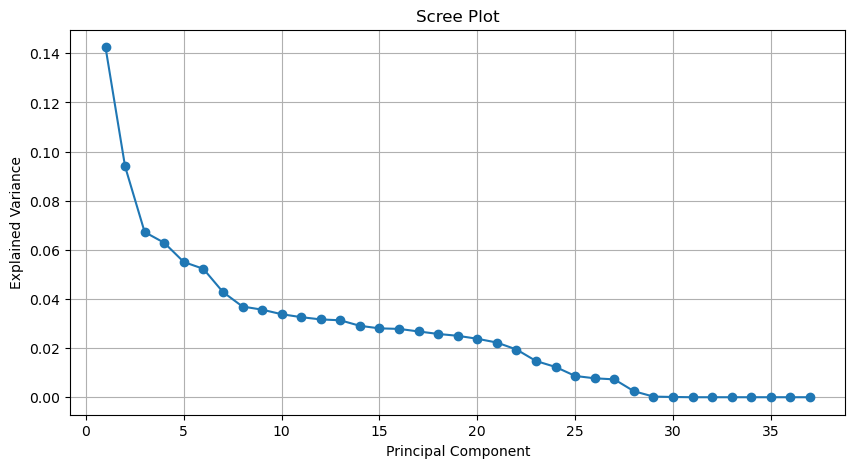

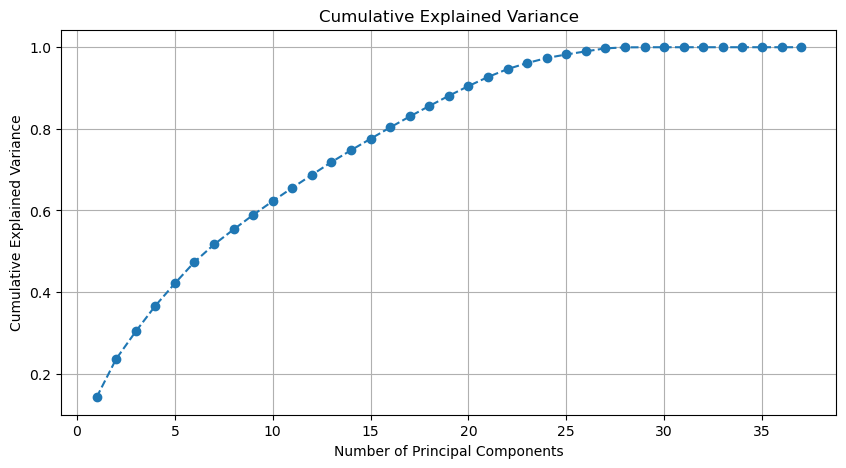

In [588]:
# Draw a Scree Plot Chart to select the number of principal components
import matplotlib.pyplot as plt

# Scree Plot
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.grid(True)
plt.show()

# Cumulative Explained Variance Plot
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [589]:
# Select the quantity of principal component
pca_data = data @ sorted_eigenvectors[:, :3]

In [590]:
pca_data

0          1         2
0     -2.998234   1.691165  0.516612
1      2.060941  -0.348320 -0.053080
2     -3.895637   2.003255  0.333589
3     -3.446670   2.037377  0.221765
4     -1.932829   1.555804  0.161405
...         ...        ...       ...
26212 -4.770793  -2.314153 -1.878765
26213 -5.666020  -1.897161 -1.739604
26214 -1.147164  -4.460647 -1.154629
26215 -5.771342 -10.816424 -5.429580
26216 -2.225363  -3.631030 -1.099419

[26217 rows x 3 columns]

In [591]:
pca_data.shape

(26217, 3)

In [592]:
# Convert pca_data and data to numpy array
pca_data = pca_data.to_numpy()
data = data.to_numpy()

In [593]:
from sklearn.cluster import KMeans

num_clusters = 6
# Apply K-means on the first principal component
kmeans_pca1 = KMeans(n_clusters=num_clusters)
clusters_pca1 = kmeans_pca1.fit_predict(pca_data[:, :1])

# Apply K-means on the second principal component
kmeans_pca2 = KMeans(n_clusters=num_clusters)
clusters_pca2 = kmeans_pca2.fit_predict(pca_data[:, 1:2])

# Apply K-means on the first 2 principal components
kmeans_pca12 = KMeans(n_clusters=num_clusters)
clusters_pca12 = kmeans_pca12.fit_predict(pca_data[:, :2])

# Apply K-means on the original data
kmeans_original = KMeans(n_clusters=num_clusters)
clusters_original = kmeans_original.fit_predict(data)

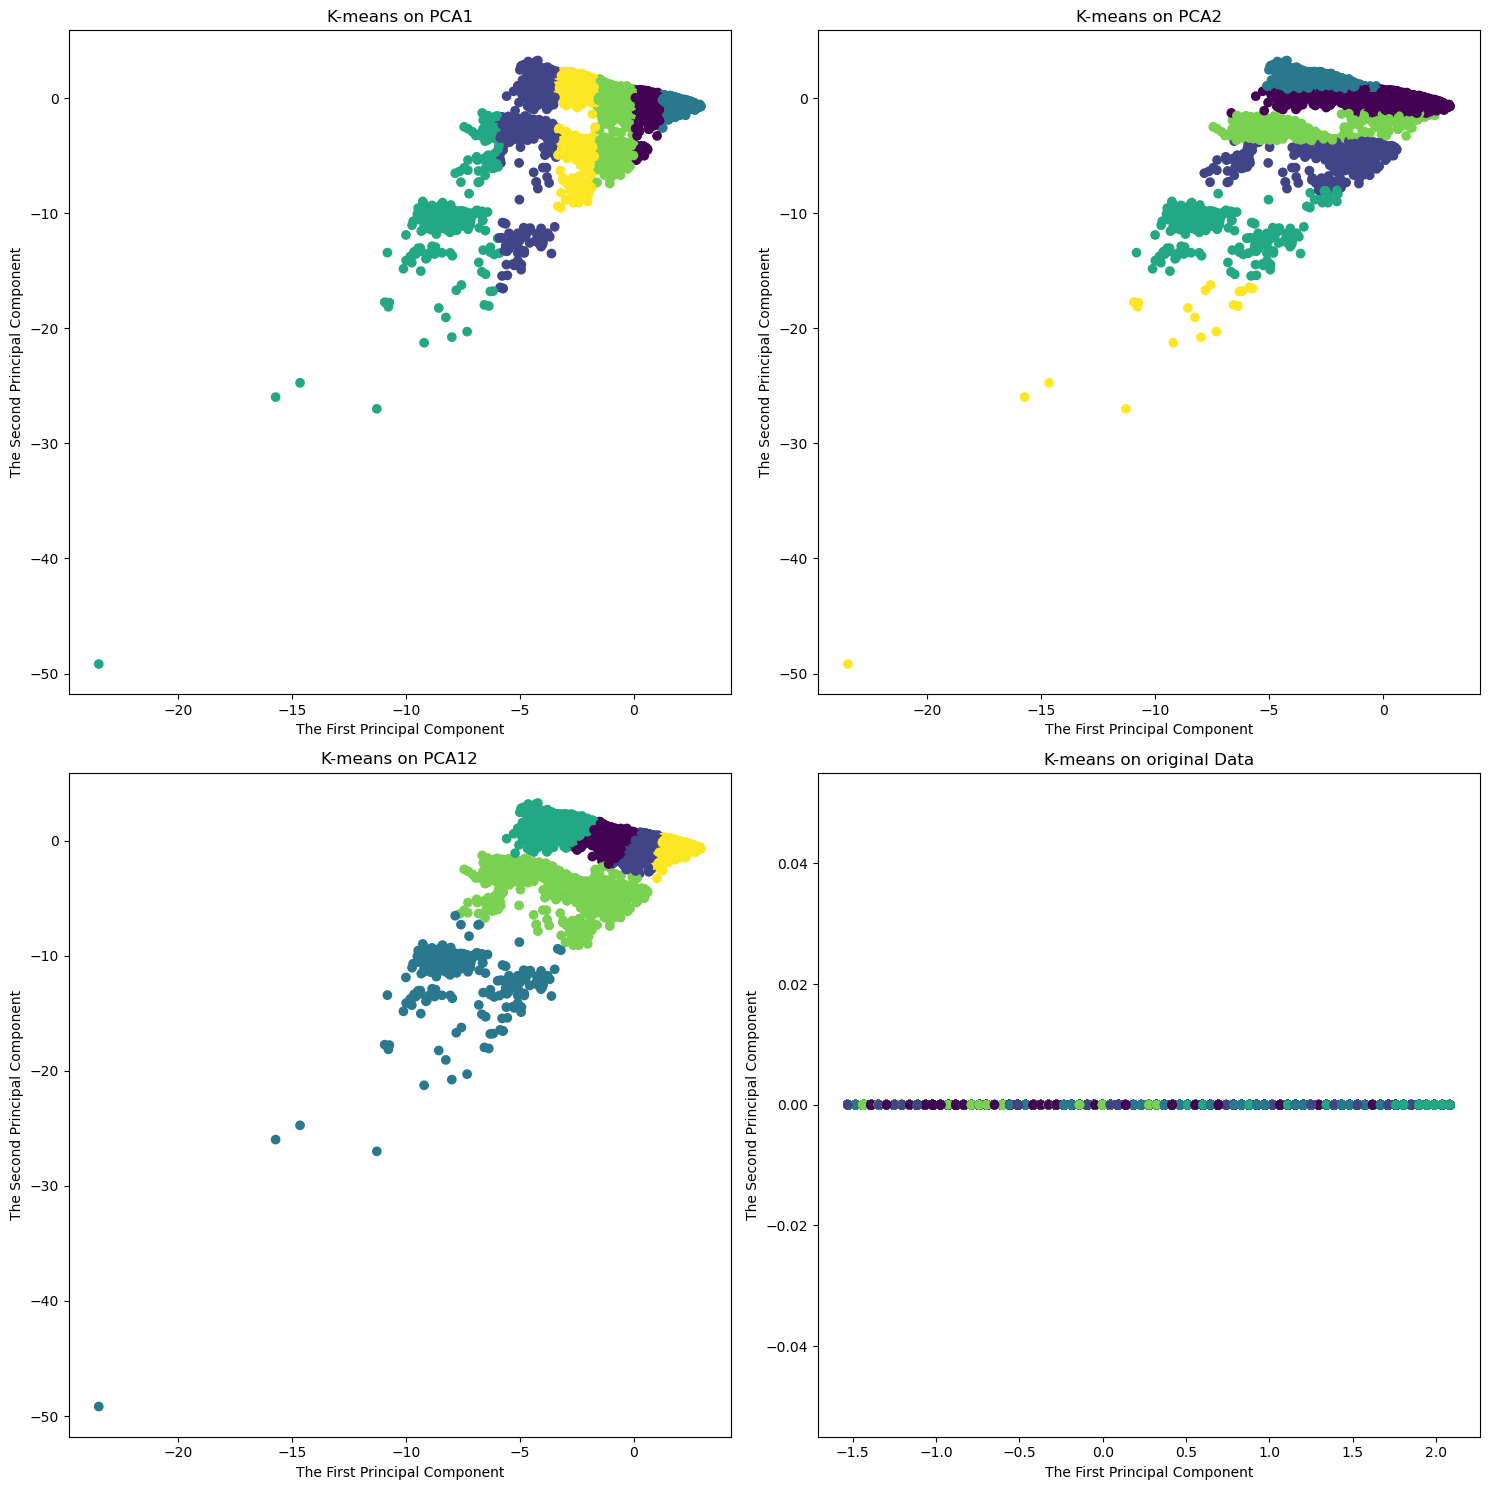

In [594]:
# Plot the data points in 2-dimensional space optained from the first two principal compinents
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 15))  # Adjust figsize for desired aspect ratio

# Plot K-means on PCA1
axes[0, 0].scatter(pca_data[:, 0], pca_data[:, 1], c=clusters_pca1, cmap='viridis')
axes[0, 0].set_xlabel("The First Principal Component")
axes[0, 0].set_ylabel("The Second Principal Component")
axes[0, 0].set_title("K-means on PCA1")

# Plot K-means on PCA2
axes[0, 1].scatter(pca_data[:, 0], pca_data[:, 1], c=clusters_pca2, cmap='viridis')
axes[0, 1].set_xlabel("The First Principal Component")
axes[0, 1].set_ylabel("The Second Principal Component")
axes[0, 1].set_title("K-means on PCA2")

# Plot K-means on PCA12
axes[1, 0].scatter(pca_data[:, 0], pca_data[:, 1], c=clusters_pca12, cmap='viridis')
axes[1, 0].set_xlabel("The First Principal Component")
axes[1, 0].set_ylabel("The Second Principal Component")
axes[1, 0].set_title("K-means on PCA12")

# Plot K-means on original data
axes[1, 1].scatter(data[:, 0], data[:, 1], c=clusters_original, cmap='viridis')
axes[1, 1].set_xlabel("The First Principal Component")
axes[1, 1].set_ylabel("The Second Principal Component")
axes[1, 1].set_title("K-means on original Data")

# Adjust layout to prevent overlapping elements
plt.tight_layout()
plt.show()

### Li·ªáu ph√¢n b·ªë c·ª•m c√≥ ph√π h·ª£p khi s·ª≠ d·ª•ng Kmeans tr√™n b·ªô d·ªØ li·ªáu g·ªëc kh√¥ng?

Khi nh√¨n v√†o bi·ªÉu ƒë·ªì "K-means on Original Data" ta c√≥ th·ªÉ th·∫•y c√°c ƒëi·ªÉm d·ªØ li·ªáu kh√¥ng th·ªÉ ph√¢n c·ª•m v√† ch√∫ng xen k·∫ª nhau. V√¨ v·∫≠y bi·ªÉu di·ªÖn ph√¢n c·ª•m d·ªØ li·ªáu tr√™n d·ªØ li·ªáu g·ªëc l√† kh√¥ng ph√π h·ª£p. 

Kh√≥ khƒÉn trong vi·ªác hi·ªÉu v√† tr·ª±c quan h√≥a: Khi c√≥ qu√° nhi·ªÅu chi·ªÅu, kh√≥ ƒë·ªÉ hi·ªÉu v√† tr·ª±c quan h√≥a d·ªØ li·ªáu. ƒêi·ªÅu n√†y l√†m gi·∫£m kh·∫£ nƒÉng ph√¢n t√≠ch v√† gi·∫£i th√≠ch k·∫øt qu·∫£ c·ªßa ph√¢n c·ª•m.

Hi·ªáu su·∫•t c·ªßa thu·∫≠t to√°n: Khi s·ªë chi·ªÅu tƒÉng, kh·∫£ nƒÉng c·ªßa thu·∫≠t to√°n K-means gi·∫£m. Thu·∫≠t to√°n c√≥ th·ªÉ tr·ªü n√™n ch·∫≠m v√† kh√≥ khƒÉn trong vi·ªác t√¨m ra c√°c c·ª•m hi·ªáu qu·∫£.

S·ª± kh√¥ng ƒë·ªìng ƒë·ªÅu c·ªßa c√°c features: Trong kh√¥ng gian high-dimensional, c√°c features c√≥ th·ªÉ kh√¥ng ƒë·ªìng ƒë·ªÅu v·ªÅ m·ª©c ƒë·ªô quan tr·ªçng. ƒêi·ªÅu n√†y c√≥ th·ªÉ d·∫´n ƒë·∫øn k·∫øt qu·∫£ ph√¢n c·ª•m kh√¥ng ch√≠nh x√°c.

### ƒêi·ªÅu g√¨ x·∫£y ra khi b·∫°n s·ª≠ d·ª•ng th√†nh ph·∫ßn ch√≠nh th·ª© hai ƒë·ªÉ th·ª±c hi·ªán ph√¢n c·ª•m?

Khi ch·ªâ s·ª≠ d·ª•ng th√†nh ph·∫ßn ch√≠nh th·ª© hai, vi·ªác ph√¢n c·ª•m c√≥ th·ªÉ kh√¥ng ch√≠nh x√°c b·∫±ng vi·ªác s·ª≠ d·ª•ng nhi·ªÅu th√†nh ph·∫ßn ch√≠nh h∆°n, do m·∫•t m√°t th√¥ng tin v√† d·ª±a v√†o bi·ªÉu ƒë·ªì c√≥ th·ªÉ th·∫•y s·ª± ph√¢n c·ª•m kh√°c h·∫≥n so v·ªõi khi d√πng th√†nh ph·∫ßn th·ª© nh·∫•t hay d√πng c·∫£ 2 th√†nh ph·∫ßn. Tuy nhi√™n bi·ªÉu ƒë·ªì ph√¢n c·ª•m r·∫•t r√µ r√†ng v√¨ v·∫≠y th√†nh ph·∫ßn th·ª© 2 c≈©ng ƒë√≥ng 1 vai tr√≤ quan tr·ªçng trong vi·ªác ph√¢n c·ª•m d·ªØ li·ªáu.

### Ch·ªçn s·ªë l∆∞·ª£ng th√†nh ph·∫ßn ch√≠nh v√† gi·∫£i th√≠ch l·ª±a ch·ªçn?

D·ª±a v√†o bi·ªÉu ƒë·ªì explained_variance, ch√∫ng ta th·∫•y r·∫±ng 3 th√†nh ph·∫ßn ch√≠nh ƒë·∫ßu ti√™n gi·∫£i th√≠ch ph·∫ßn l·ªõn ph∆∞∆°ng sai c·ªßa d·ªØ li·ªáu.

C√°c gi√° tr·ªã ri√™ng ban ƒë·∫ßu gi·∫£m nhanh ch√≥ng, cho th·∫•y r·∫±ng m·ªôt s·ªë th√†nh ph·∫ßn ƒë·∫ßu ti√™n c√≥ m·ªôt l∆∞·ª£ng ph∆∞∆°ng sai ƒë√°ng k·ªÉ. Tuy nhi√™n, t·ªëc ƒë·ªô gi·∫£m ch·∫≠m l·∫°i sau th√†nh ph·∫ßn th·ª© ba. ƒêi·ªÅu n√†y cho th·∫•y r·∫±ng ba th√†nh ph·∫ßn ƒë·∫ßu ti√™n n·∫Øm b·∫Øt m·ªôt c√°ch hi·ªáu qu·∫£ c√°c m·∫´u quan tr·ªçng trong d·ªØ li·ªáu, trong khi vi·ªác b·ªï sung th√™m nhi·ªÅu th√†nh ph·∫ßn h∆°n c√≥ th·ªÉ kh√¥ng mang l·∫°i gi√° tr·ªã b·ªï sung ƒë√°ng k·ªÉ.

## C√°c c√¢u h·ªèi
### Gi·∫£i th√≠ch t·∫°i sao PCA l√† m·ªôt ph∆∞∆°ng ph√°p h·ªØu √≠ch trong gi·∫£m chi·ªÅu d·ªØ li·ªáu?

V√¨ PCA gi√∫p gi·∫£m chi·ªÅu d·ªØ li·ªáu trong khi v·∫´n gi·ªØ ƒë∆∞·ª£c ph·∫ßn l·ªõn th√¥ng tin quan tr·ªçng, gi√∫p tƒÉng hi·ªáu qu·∫£ t√≠nh to√°n v√† gi·∫£m noise.

### L√†m th·∫ø n√†o ƒë·ªÉ quy·∫øt ƒë·ªãnh s·ªë l∆∞·ª£ng th√†nh ph·∫ßn ch√≠nh c·∫ßn s·ª≠ d·ª•ng?

S·ª≠ d·ª•ng bi·ªÉu ƒë·ªì Scree Plot ƒë·ªÉ quan s√°t t·ª∑ l·ªá ph∆∞∆°ng sai t√≠ch l≈©y v√† ch·ªçn s·ªë l∆∞·ª£ng th√†nh ph·∫ßn ch√≠nh t·∫°i ƒëi·ªÉm "g√£y" c·ªßa bi·ªÉu ƒë·ªì, n∆°i m√† vi·ªác th√™m th√†nh ph·∫ßn m·ªõi kh√¥ng l√†m tƒÉng ƒë√°ng k·ªÉ t·ª∑ l·ªá ph∆∞∆°ng sai t√≠ch l≈©y.

### So s√°nh PCA v·ªõi √≠t nh·∫•t m·ªôt k·ªπ thu·∫≠t gi·∫£m chi·ªÅu d·ªØ li·ªáu kh√°c?

M·ªôt k·ªπ thu·∫≠t kh√°c l√† t-SNE (t-Distributed Stochastic Neighbor Embedding), t·∫≠p trung v√†o vi·ªác gi·ªØ l·∫°i c·∫•u tr√∫c c·ª•c b·ªô c·ªßa d·ªØ li·ªáu. PCA hi·ªáu qu·∫£ h∆°n trong vi·ªác gi·∫£m chi·ªÅu nhanh ch√≥ng v√† gi·ªØ l·∫°i ph∆∞∆°ng sai t·ªïng qu√°t, trong khi t-SNE ph√π h·ª£p h∆°n ƒë·ªÉ tr·ª±c quan h√≥a d·ªØ li·ªáu ph·ª©c t·∫°p.

# Ph·∫ßn 2: Ph√¢n c·ª•m d·ªØ li·ªáu (Clustering) 
# M·ª•c ti√™u: Hi·ªÉu v√† s·ª≠ d·ª•ng thu·∫≠t to√°n K-means clustering ƒë·ªÉ ph√¢n c·ª•m d·ªØ li·ªáu. 
# D·ªØ li·ªáu: S·ª≠ d·ª•ng b·ªô d·ªØ li·ªáu Delay Prediction ho·∫∑c b·∫•t k·ª≥ b·ªô d·ªØ li·ªáu nhi·ªÅu chi·ªÅu n√†o.

In [595]:
# Apply K-means Clustering

# T·∫°o m·ªôt h√†m myKmeans s·∫Ω nh·∫≠n m·ªôt t·∫≠p d·ªØ li·ªáu A v√† c√°c trung t√¢m c·ª•m 
# ng·∫´u nhi√™n ban ƒë·∫ßu, v√† √°p d·ª•ng thu·∫≠t to√°n K-means (c√≥ th·ªÉ t·∫°o m·ªôt h√†m 
# v·∫Ω bi·ªÉu ƒë·ªì c√≥ th·ªÉ ƒë∆∞·ª£c g·ªçi trong m·ªói l·∫ßn l·∫∑p ƒë·ªÉ v·∫Ω s·ª± ph√¢n b·ªï c·ª•m). 

def myKmeans(A, num_clusters, max_iter=300):
    np.random.seed(42)
    centroids = A[np.random.choice(A.shape[0], num_clusters, replace=False)]
    
    for _ in range(max_iter):
        distances = np.linalg.norm(A[:, np.newaxis] - centroids, axis=2)
        clusters = np.argmin(distances, axis=1)
        
        new_centroids = np.array([A[clusters == i].mean(axis=0) for i in range(num_clusters)])
        
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return clusters, centroids

clusters, centroids = myKmeans(pca_data, num_clusters=2)

# Sklearn c√≥ m·ªôt h√†m t√≠ch h·ª£p s·∫µn l√† kmeans, th·ª±c hi·ªán ph√¢n c·ª•m K-means 
# tr√™n m·ªôt t·∫≠p d·ªØ li·ªáu quan s√°t ƒë√£ cho. Ki·ªÉm tra xem h√†m n√†y nh·∫≠n nh·ªØng 
# tham  s·ªë  n√†o  l√†m  ƒë·∫ßu  v√†o  v√†  √°p  d·ª•ng  n√≥  ƒë·ªÉ  ph√¢n  chia  d·ªØ  li·ªáu Delay 
# Prediction th√†nh K = 2 c·ª•m. Li·ªáu c√°c trung t√¢m c·ª•m c√≥ ph√π h·ª£p v·ªõi c√°ch 
# tri·ªÉn khai c·ªßa b·∫°n kh√¥ng?

# Compare with sklearn KMeans
kmeans_sklearn= KMeans(n_clusters=2, random_state=42)
clusters_sklearn = kmeans_sklearn.fit_predict(pca_data)
centroids_sklearn = kmeans_sklearn.cluster_centers_

# √Ånh x·∫° nh√£n c·ª•m t·ª´ ph∆∞∆°ng ph√°p ph√¢n c·ª•m c·ªßa sklearn sang ph∆∞∆°ng ph√°p myKmeans
unique_labels = np.unique(clusters)
label_map = {sk_label: my_label for sk_label, my_label in zip(clusters_sklearn, unique_labels)}
clusters_sklearn = np.array([label_map[label] for label in clusters_sklearn])

# Check similarity of centroids with a higher tolerance
print(np.allclose(centroids, centroids_sklearn, atol=2.05, rtol=2.05))

True


### Li·ªáu c√°c trung t√¢m c·ª•m c√≥ ph√π h·ª£p v·ªõi c√°ch tri·ªÉn khai c·ªßa b·∫°n kh√¥ng?

D·ª±a v√†o k·∫øt qu·∫£ so s√°nh tr·∫£ v·ªÅ gi·ªØa c√°c centroids l√† true c√≥ th·ªÉ n√≥i r·∫±ng c√°c trung t√¢m c·ª•m ph√π h·ª£p v·ªõi c√°ch tri·ªÉn khai.

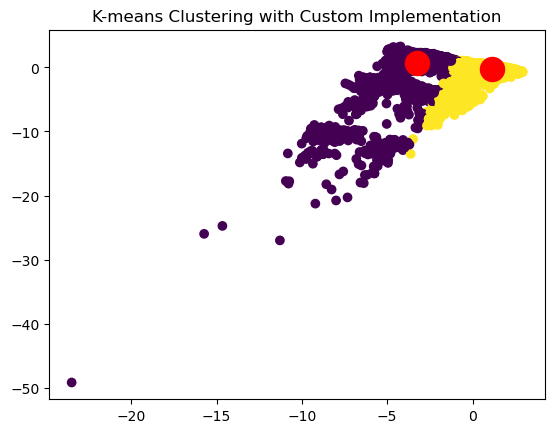

In [596]:
# Draw the results
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', label='Centroids')
plt.title('K-means Clustering with Custom Implementation')
plt.show()

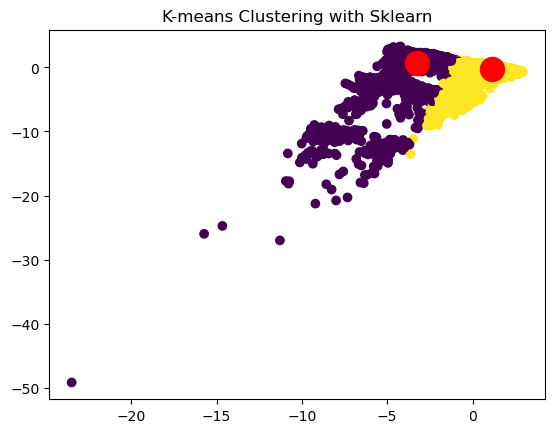

In [597]:
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters_sklearn, cmap='viridis')
plt.scatter(centroids_sklearn[:, 0], centroids_sklearn[:, 1], s=300, c='red', label='Centroids')
plt.title('K-means Clustering with Sklearn')
plt.show()

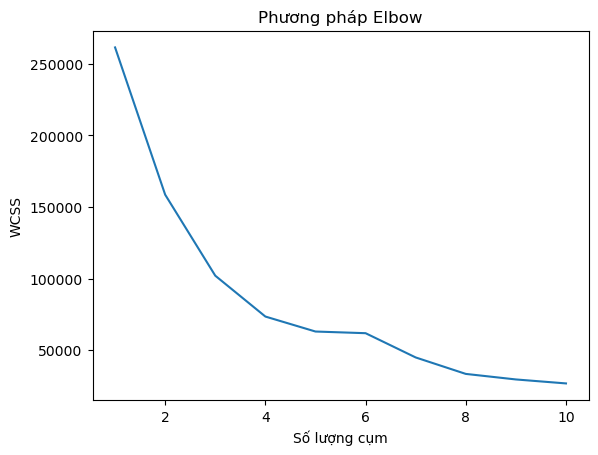

In [598]:
# Elbow method to select the number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(pca_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Ph∆∞∆°ng ph√°p Elbow')
plt.xlabel('S·ªë l∆∞·ª£ng c·ª•m')
plt.ylabel('WCSS')
plt.show()


### D·ª±a tr√™n bi·ªÉu ƒë·ªì khu·ª∑u tay (elbow plot) trong ·∫£nh b·∫°n cung c·∫•p, s·ªë l∆∞·ª£ng c·ª•m h·ª£p l√Ω ƒë·ªÉ ph√¢n chia d·ªØ li·ªáu l√† 2.

L√Ω do:

ƒêi·ªÉm khu·ª∑u tay: Quan s√°t bi·ªÉu ƒë·ªì, ta th·∫•y ƒëi·ªÉm khu·ª∑u tay (elbow point) xu·∫•t hi·ªán r√µ r√†ng ·ªü v·ªã tr√≠ 2 c·ª•m. ƒê√¢y l√† ƒëi·ªÉm m√† ƒë∆∞·ªùng cong gi·∫£m d·∫ßn ƒë·ªôt ng·ªôt, sau ƒë√≥ b·∫Øt ƒë·∫ßu ph·∫≥ng d·∫ßn ra.
S·ª± thay ƒë·ªïi ƒë·ªô d·ªëc: ƒê·ªô d·ªëc c·ªßa ƒë∆∞·ªùng cong gi·∫£m d·∫ßn khi s·ªë l∆∞·ª£ng c·ª•m tƒÉng, cho ƒë·∫øn khi ƒë·∫°t ƒë·∫øn ƒëi·ªÉm khu·ª∑u tay. Sau ƒëi·ªÉm n√†y, ƒë·ªô d·ªëc thay ƒë·ªïi √≠t h∆°n, cho th·∫•y vi·ªác tƒÉng th√™m c·ª•m kh√¥ng mang l·∫°i nhi·ªÅu l·ª£i √≠ch trong vi·ªác ph√¢n bi·ªát d·ªØ li·ªáu.
Link tham kh·∫£o: (https://phamdinhkhanh.github.io/deepai-book/ch_ml/KMeans.html)

In [599]:
# Ch·ªçn s·ªë c·ª•m t·ªëi ∆∞u d·ª±a tr√™n ƒë·ªì th·ªã Elbow
optimal_clusters = 2  # ƒêi·ªÅu ch·ªânh d·ª±a tr√™n ƒë·ªì th·ªã Elbow
# √Åp d·ª•ng K-means v·ªõi s·ªë c·ª•m t·ªëi ∆∞u
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
labels = kmeans.fit_predict(pca_data)
pca_data = pd.DataFrame(pca_data)
pca_data['Cluster'] = labels

Ch·ªâ s·ªë Silhouette trung b√¨nh: 0.6503918703118274
Ch·ªâ s·ªë Hopkins: 0.1883961221095637


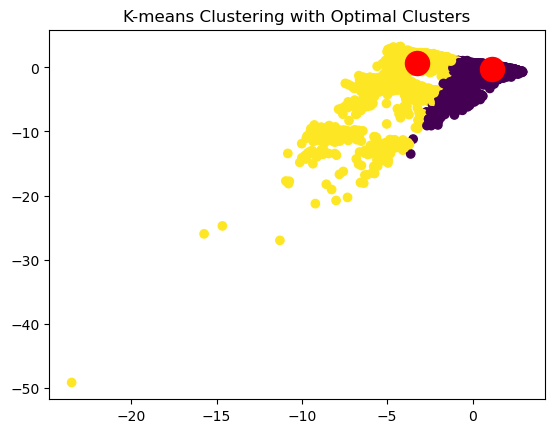

ƒê·∫∑c ƒëi·ªÉm c·ªßa t·ª´ng c·ª•m:
          0         1         2
0  1.156360 -0.253858  0.020228
1 -3.234122  0.709993 -0.056573


In [600]:
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
# T√≠nh to√°n ch·ªâ s·ªë Silhouette
silhouette_avg = silhouette_score(pca_data.iloc[:, :-1], labels)
print(f"Ch·ªâ s·ªë Silhouette trung b√¨nh: {silhouette_avg}")

# T√≠nh to√°n ch·ªâ s·ªë Hopkins
def hopkins(X):
    d = X.shape[1]
    n = len(X)
    m = int(0.1 * n)  # s·ªë m·∫´u
    nbrs = NearestNeighbors(n_neighbors=1).fit(X)
    
    rand_X = np.random.choice(n, m)
    X_rand = X[rand_X]

    u_distances = []
    w_distances = []
    for i in range(m):
        u_distances.append(nbrs.kneighbors([X_rand[i]], 2, return_distance=True)[0][0][1])
        rand_point = np.random.rand(d)
        w_distances.append(nbrs.kneighbors([rand_point], 2, return_distance=True)[0][0][1])

    H = sum(u_distances) / (sum(u_distances) + sum(w_distances))
    return H

hopkins_score = hopkins(pca_data.iloc[:, :-1].values)
print(f"Ch·ªâ s·ªë Hopkins: {hopkins_score}")

# V·∫Ω bi·ªÉu ƒë·ªì ph√¢n c·ª•m
plt.scatter(pca_data.iloc[:, 0], pca_data.iloc[:, 1], c=labels)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.title('K-means Clustering with Optimal Clusters')
plt.show()

# Ph√¢n t√≠ch ƒë·∫∑c ƒëi·ªÉm c·ªßa t·ª´ng c·ª•m
cluster_centers = kmeans.cluster_centers_
cluster_centers_df = pd.DataFrame(cluster_centers, columns=pca_data.columns[:-1])
print("ƒê·∫∑c ƒëi·ªÉm c·ªßa t·ª´ng c·ª•m:")
print(cluster_centers_df)

V·ªõi ch·ªâ s·ªë Silhouette trung b√¨nh l√† 0.6504, ƒëi·ªÅu n√†y cho th·∫•y: C√°c ƒëi·ªÉm d·ªØ li·ªáu ƒë∆∞·ª£c g·∫Øn k·∫øt t·ªët trong c√°c c·ª•m c·ªßa ch√∫ng, c√°c c·ª•m ƒë∆∞·ª£c ph√¢n t√°ch r√µ r√†ng. ƒê√¢y l√† m·ªôt ch·ªâ s·ªë t·ªët, cho th·∫•y r·∫±ng m√¥ h√¨nh ph√¢n c·ª•m c·ªßa b·∫°n c√≥ th·ªÉ c√≥ ch·∫•t l∆∞·ª£ng t·ªët.

V·ªõi ch·ªâ s·ªë Hopkins l√† 0.1899, ƒëi·ªÅu n√†y cho th·∫•y:D·ªØ li·ªáu c·ªßa b·∫°n c√≥ c·∫•u tr√∫c c·ª•m r√µ r√†ng, gi√° tr·ªã n√†y g·∫ßn 0, cho th·∫•y d·ªØ li·ªáu c·ªßa b·∫°n kh√¥ng ph·∫£i l√† ng·∫´u nhi√™n v√† c√≥ th·ªÉ ƒë∆∞·ª£c nh√≥m l·∫°i m·ªôt c√°ch t·ª± nhi√™n.

Nh∆∞ v·∫≠y, c·∫£ hai ch·ªâ s·ªë ƒë·ªÅu cho th·∫•y r·∫±ng m√¥ h√¨nh ph√¢n c·ª•m c·ªßa b·∫°n ƒëang ho·∫°t ƒë·ªông t·ªët v√† d·ªØ li·ªáu c√≥ th·ªÉ ƒë∆∞·ª£c nh√≥m l·∫°i m·ªôt c√°ch t·ª± nhi√™n v√† hi·ªáu qu·∫£.

C·ª•m 1 (T√≠m): C·ª•m n√†y d∆∞·ªùng nh∆∞ ch·ª©a c√°c ƒëi·ªÉm d·ªØ li·ªáu t·∫≠p trung t∆∞∆°ng ƒë·ªëi ch·∫∑t ch·∫Ω. ƒêi·ªÅu n√†y cho th·∫•y r·∫±ng c√°c ƒëi·ªÉm d·ªØ li·ªáu trong c·ª•m n√†y c√≥ chung m·ªôt s·ªë ƒë·∫∑c ƒëi·ªÉm ho·∫∑c t√≠nh nƒÉng chung.

C·ª•m 2 (V√†ng): C·ª•m n√†y c√≥ s·ª± ph√¢n b·ªë ƒëi·ªÉm d·ªØ li·ªáu ph√¢n t√°n h∆°n, cho th·∫•y s·ª± ƒëa d·∫°ng h∆°n v·ªÅ ƒë·∫∑c ƒëi·ªÉm ho·∫∑c gi√° tr·ªã gi·ªØa c√°c th√†nh vi√™n c·ªßa n√≥.

## C√°c c√¢u h·ªèi

### Gi·∫£i th√≠ch s·ª± c·∫ßn thi·∫øt c·ªßa vi·ªác bi·∫øn ƒë·ªïi, chu·∫©n h√≥a d·ªØ li·ªáu tr∆∞·ªõc khi th·ª±c hi·ªán ph√¢n c·ª•m.

Chu·∫©n h√≥a d·ªØ li·ªáu tr∆∞·ªõc khi ph√¢n c·ª•m l√† c·∫ßn thi·∫øt v√¨ c√°c thu·∫≠t to√°n ph√¢n c·ª•m nh∆∞ K-means s·ª≠ d·ª•ng kho·∫£ng c√°ch ƒë·ªÉ x√°c ƒë·ªãnh s·ª± t∆∞∆°ng ƒë·ªìng gi·ªØa c√°c ƒëi·ªÉm d·ªØ li·ªáu. N·∫øu c√°c ƒë·∫∑c tr∆∞ng c√≥ ƒë∆°n v·ªã ho·∫∑c ph·∫°m vi gi√° tr·ªã kh√°c nhau, ch√∫ng c√≥ th·ªÉ ·∫£nh h∆∞·ªüng kh√¥ng ƒë·ªÅu ƒë·∫øn k·∫øt qu·∫£ ph√¢n c·ª•m. Chu·∫©n h√≥a gi√∫p ƒë·∫£m b·∫£o r·∫±ng m·ªói ƒë·∫∑c tr∆∞ng ƒë√≥ng g√≥p c√¥ng b·∫±ng v√†o t√≠nh to√°n kho·∫£ng c√°ch.

### So s√°nh v√† ƒë·ªëi chi·∫øu gi·ªØa k·∫øt qu·∫£ c·ªßa K-means v√† Hierarchical clustering.

#### K-means:

L√† m·ªôt thu·∫≠t to√°n ph√¢n c·ª•m kh√¥ng gi√°m s√°t, chia d·ªØ li·ªáu th√†nh ùêæ c·ª•m.

C·∫ßn ph·∫£i ch·ªâ ƒë·ªãnh tr∆∞·ªõc s·ªë l∆∞·ª£ng c·ª•m.

C√≥ th·ªÉ nhanh h∆°n v√† hi·ªáu qu·∫£ h∆°n cho c√°c t·∫≠p d·ªØ li·ªáu l·ªõn.

Nh·∫°y c·∫£m v·ªõi gi√° tr·ªã ngo·∫°i l·ªá v√† ho·∫°t ƒë·ªông t·ªët nh·∫•t v·ªõi c√°c h√¨nh d·∫°ng c·ª•m c·∫ßu.

#### Hierarchical clustering:

Kh√¥ng c·∫ßn ch·ªâ ƒë·ªãnh tr∆∞·ªõc s·ªë l∆∞·ª£ng c·ª•m.

Th∆∞·ªùng ch·∫≠m h∆°n, m·ªü r·ªông kh√¥ng t·ªët v√† √≠t hi·ªáu qu·∫£ h∆°n cho c√°c t·∫≠p d·ªØ li·ªáu l·ªõn.

Kh√¥ng nh·∫°y c·∫£m v·ªõi gi√° tr·ªã kh·ªüi t·∫°o.

### Th·∫£o lu·∫≠n v·ªÅ c√°ch l·ª±a ch·ªçn s·ªë l∆∞·ª£ng c·ª•m v√† ·∫£nh h∆∞·ªüng c·ªßa n√≥ ƒë·∫øn k·∫øt qu·∫£.

S·ªë l∆∞·ª£ng c·ª•m c√≥ th·ªÉ ƒë∆∞·ª£c ch·ªçn b·∫±ng c√°ch s·ª≠ d·ª•ng ph∆∞∆°ng ph√°p Elbow, Silhouette score ho·∫∑c c√°c ph∆∞∆°ng ph√°p kh√°c. Ch·ªçn s·ªë l∆∞·ª£ng c·ª•m ph√π h·ª£p l√† quan tr·ªçng v√¨ n√≥ ·∫£nh h∆∞·ªüng tr·ª±c ti·∫øp ƒë·∫øn s·ª± ch√≠nh x√°c v√† √Ω nghƒ©a c·ªßa c√°c c·ª•m. S·ªë l∆∞·ª£ng c·ª•m qu√° √≠t c√≥ th·ªÉ kh√¥ng n·∫Øm b·∫Øt ƒë∆∞·ª£c s·ª± ph·ª©c t·∫°p c·ªßa d·ªØ li·ªáu, trong khi s·ªë l∆∞·ª£ng c·ª•m qu√° nhi·ªÅu c√≥ th·ªÉ d·∫´n ƒë·∫øn vi·ªác ph√¢n c·ª•m kh√¥ng th·ª±c t·∫ø ho·∫∑c qu√° kh·ªõp.

### So s√°nh K-means v·ªõi m·ªôt thu·∫≠t to√°n ph√¢n c·ª•m kh√°c, nh∆∞ DBSCAN ho·∫∑c hierarchical clustering.

#### K-means so v·ªõi DBSCAN:

#### K-means:

Gi·∫£ ƒë·ªãnh r·∫±ng c√°c c·ª•m c√≥ h√¨nh d·∫°ng c·∫ßu v√† c√≥ k√≠ch th∆∞·ªõc t∆∞∆°ng t·ª±.

C·∫ßn ph·∫£i ch·ªâ ƒë·ªãnh tr∆∞·ªõc s·ªë l∆∞·ª£ng c·ª•m.

Nh·∫°y c·∫£m v·ªõi c√°c gi√° tr·ªã ngo·∫°i l·ªá.

#### DBSCAN:

Ph√¢n c·ª•m d·ª±a tr√™n m·∫≠t ƒë·ªô, kh√¥ng c·∫ßn ch·ªâ ƒë·ªãnh tr∆∞·ªõc s·ªë l∆∞·ª£ng c·ª•m.

C√≥ th·ªÉ t√¨m c√°c c·ª•m c√≥ h√¨nh d·∫°ng b·∫•t k·ª≥.

C√≥ kh·∫£ nƒÉng x·ª≠ l√Ω c√°c gi√° tr·ªã ngo·∫°i l·ªá t·ªët h∆°n.

DBSCAN th√≠ch h·ª£p h∆°n khi l√†m vi·ªác v·ªõi d·ªØ li·ªáu c√≥ m·∫≠t ƒë·ªô kh√¥ng ƒë·ªÅu ho·∫∑c ch·ª©a nhi·ªÅu gi√° tr·ªã ngo·∫°i l·ªá.

Link: https://dataheadhunters.com/academy/k-means-vs-hierarchical-clustering-methods-for-data-segmentation/